In [ ]:
!pip install tensorflow scikit-learn


In [ ]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregar o conjunto de dados NSL-KDD
# Caminho dataset
train_path = '/content/drive/MyDrive/2 2023/PCC177 - REDES NEURAIS E APRENDIZADOS PROFUNDO/PESQUISA PART 2/DEEP LEARNING/dataset_/KDDTrain+.txt'


In [ ]:
# Renomear as colunas
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]
train_df = pd.read_csv(train_path, names=columns)

In [ ]:
train_df

In [ ]:
train_df.drop(['difficulty'],axis=1,inplace=True)
train_df.shape

(125973, 42)

In [ ]:
#dataset informar
train_df.info()

In [ ]:
train_df.describe().T

In [ ]:
train_df['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

O código define uma função chamada `change_label` que recebe um DataFrame `df` como entrada e substitui determinados valores na coluna 'label' pelos seus respectivos tipos de ataque. As classes de ataque são categorizadas como 'Dos', 'R2L' (Right to Left), 'Probe' e 'U2R' (User to Root). Esse tipo de pré-processamento é comumente realizado no contexto de detecção de intrusões ou segurança de rede, onde o objetivo é categorizar diferentes tipos de ataques em classes mais amplas.

Aqui está uma explicação das classes de ataque e suas respectivas etiquetas no código:

- **Dos (Negação de Serviço):**
  - 'apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'

- **R2L (Right to Left - Direito para Esquerdo):**
  - 'ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'spy', 'warezclient', 'warezmaster', 'xlock', 'xsnoop'

- **Probe (Sonda):**
  - 'ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'

- **U2R (User to Root - Usuário para Root):**
  - 'buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm'

O método `replace` é utilizado para substituir os valores na coluna 'label' pelos respectivos tipos de ataque.

Lembre-se de que o sucesso dessa função depende da correção e consistência dos dados originais. Ela assume que as etiquetas na coluna 'label' correspondem exatamente aos tipos de ataque especificados. Se houver variações ou erros de digitação nas etiquetas, a função pode não funcionar conforme o esperado. Além disso, certifique-se de chamar essa função no seu DataFrame (`change_label(seu_dataframe)`) para aplicar essas alterações.

In [ ]:
def change_label(df):
    # Mapeamento de etiquetas para classes de ataque
    attack_mapping = {
        'Dos': ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'],
        'R2L': ['ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'spy', 'warezclient', 'warezmaster', 'xlock', 'xsnoop'],
        'Probe': ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'],
        'U2R': ['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm']
    }

    # Verificar se a coluna 'label' existe no DataFrame
    if 'label' not in df.columns:
        raise ValueError("A coluna 'label' não está presente no DataFrame.")

    # Substituir os valores na coluna 'label' pelos tipos de ataque correspondentes
    for attack_class, attack_labels in attack_mapping.items():
        df['label'].replace(attack_labels, attack_class, inplace=True)

# Exemplo de uso:
change_label(train_df)


In [ ]:
print(train_df.label.value_counts())


normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64


In [ ]:
import pandas as pd

def create_multi_label_dataframe(original_dataframe, label_column='label', target_classes=['Dos', 'Probe', 'R2L', 'U2R', 'normal']):
    """
    Cria um DataFrame com etiquetas de classe múltipla.

    Parameters:
    - original_dataframe (pd.DataFrame): DataFrame original contendo as etiquetas.
    - label_column (str): Nome da coluna de etiquetas no DataFrame original.
    - target_classes (list): Lista das classes desejadas.

    Returns:
    - pd.DataFrame: DataFrame com a coluna de etiquetas múltiplas.
    """
    # Verificar se a coluna de etiquetas existe no DataFrame original
    if label_column not in original_dataframe.columns:
        raise ValueError(f"A coluna '{label_column}' não está presente no DataFrame original.")

    # Verificar se as classes desejadas estão presentes no DataFrame original
    for target_class in target_classes:
        if target_class not in original_dataframe[label_column].unique():
            raise ValueError(f"A classe '{target_class}' não está presente nas etiquetas do DataFrame original.")

    # Criar uma cópia do DataFrame original com apenas a coluna de etiquetas
    multi_label_dataframe = original_dataframe[[label_column]].copy()

    # Filtrar as classes desejadas
    multi_label_dataframe = multi_label_dataframe[multi_label_dataframe[label_column].isin(target_classes)]

    return multi_label_dataframe

# Exemplo de uso:
multi_label_data = create_multi_label_dataframe(train_df)
print(multi_label_data.head())


    label
0  normal
1  normal
2     Dos
3  normal
4  normal


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Criando uma instância do StandardScaler
std_scaler = StandardScaler()

def standardization(df, columns):
    """
    Padroniza (normaliza) as colunas numéricas do DataFrame usando o StandardScaler.

    Parameters:
    - df (pd.DataFrame): DataFrame original.
    - columns (list): Lista das colunas numéricas a serem padronizadas.

    Returns:
    - pd.DataFrame: DataFrame padronizado.
    """
    # Verificar se as colunas estão presentes no DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"A coluna '{column}' não está presente no DataFrame.")

    # Criar uma cópia do DataFrame original para evitar a modificação direta
    df_copy = df.copy()

    # Padronizar as colunas numéricas usando o StandardScaler
    df_copy[columns] = std_scaler.fit_transform(df_copy[columns])

    return df_copy

# Selecionar as colunas numéricas
numeric_columns = train_df.select_dtypes(include='number').columns

# Aplicar a padronização ao DataFrame
data_standardized = standardization(train_df, numeric_columns)

# Exemplo de uso:
print(data_standardized.head())


In [ ]:
from sklearn import preprocessing

# Criar uma instância do LabelEncoder
le2 = preprocessing.LabelEncoder()

# Aplicar o Label Encoding à coluna 'label'
enc_label = le2.fit_transform(train_df['label'])

# Adicionar a coluna 'intrusion' ao DataFrame original
train_df['intrusion'] = enc_label

# Exibir o DataFrame atualizado
print(train_df.head())


In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4


In [ ]:
# Eliminar a coluna 'label' do DataFrame multi_data
train_df.drop(labels=['label'], axis=1, inplace=True)

# Exibir o DataFrame atualizado
print(train_df.head())


In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4


In [ ]:
# Aplicar One-Hot Encoding às colunas especificadas
train_df = pd.get_dummies(train_df, columns=['protocol_type', 'service', 'flag'], prefix="", prefix_sep="")

# Exibir o DataFrame atualizado
train_df.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Dividir o DataFrame em features (X_train_multi) e rótulos (y_train_multi)
y_train_multi = train_df[['intrusion']]
X_train_multi = train_df.drop(labels=['intrusion'], axis=1)

# Exibir as formas dos conjuntos de treinamento
print('X_train has shape:', X_train_multi.shape, '\ny_train has shape:', y_train_multi.shape)


X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Aplicar LabelBinarizer para transformar rótulos em representação binária
y_train_multi = LabelBinarizer().fit_transform(y_train_multi)

# Exibir os rótulos transformados
print(y_train_multi)


[[0 0 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]]


In [ ]:
import numpy as np

# Converter as variáveis para arrays NumPy
X_train_multi = np.array(X_train_multi)
y_train_multi = np.array(y_train_multi)

# Exibir as formas dos arrays
print('X_train_multi shape:', X_train_multi.shape)
print('y_train_multi shape:', y_train_multi.shape)


X_train_multi shape: (125973, 122)
y_train_multi shape: (125973, 5)


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X_train_multi, y_train_multi, test_size=0.20, random_state=42)

# Exibir as formas dos conjuntos
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (100778, 122)
y_train shape: (100778, 5)
X_test shape: (25195, 122)
y_test shape: (25195, 5)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
"""
X_train tem uma forma tridimensional, onde as dimensões representam (número de amostras, número de recursos,1).
Isso é comum ao trabalhar com modelos de séries temporais ou convolucionais em aprendizado profundo.
"""

(100778, 122, 1)


'\nX_train tem uma forma tridimensional, onde as dimensões representam (número de amostras, número de recursos,1). \nIsso é comum ao trabalhar com modelos de séries temporais ou convolucionais em aprendizado profundo.\n'

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(25195, 122, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout, Flatten, Dense

# Inicializar o modelo sequencial
model = Sequential()

# Camada de convolução 1D com 32 filtros, kernel size 3, ativação relu e padding same
model.add(Conv1D(32, 3, padding="same", input_shape=(X_train.shape[1], 1), activation='relu'))

# Camada de pooling 1D (max pooling) com pool size 4
model.add(MaxPool1D(pool_size=(4)))

# Adicionar Dropout para regularização
model.add(Dropout(0.2))

# Segunda camada de convolução 1D com 32 filtros, kernel size 3, ativação relu e padding same
model.add(Conv1D(32, 3, padding="same", activation='relu'))

# Segunda camada de pooling 1D (max pooling) com pool size 4
model.add(MaxPool1D(pool_size=(4)))

# Adicionar mais Dropout para regularização
model.add(Dropout(0.2))

# Camada de flatten para converter os dados em um vetor unidimensional
model.add(Flatten())

# Camada densa (totalmente conectada) com 50 neurônios
model.add(Dense(units=50, activation='relu'))

# Camada de saída com 5 neurônios e ativação softmax para classificação multiclasse
model.add(Dense(units=5, activation='softmax'))


In [ ]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 122, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 30, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 32)             0

* X_train e y_train: São seus dados de treinamento, onde X_train são as features e y_train são os rótulos.
* epochs: Representa o número de vezes que o modelo percorrerá todo o conjunto de treinamento durante o treinamento.
* batch_size: É o número de amostras utilizadas em cada passo de atualização dos pesos do modelo. Utilizar um valor grande pode acelerar o treinamento, mas consome mais memória.
* validation_split: Define a proporção dos dados de treinamento a serem usados para validação durante o treinamento. Neste caso, 20% dos dados são usados como conjunto de validação.

In [ ]:
# Treinar o modelo no conjunto de treinamento
history = model.fit(X_train, y_train, epochs=100, batch_size=5000, validation_split=0.2)


Epoch 1/100
17/17 [==============================] - 11s 573ms/step - loss: 2555.6558 - accuracy: 0.2567 - val_loss: 292.3057 - val_accuracy: 0.5604
Epoch 2/100
17/17 [==============================] - 9s 515ms/step - loss: 586.3042 - accuracy: 0.5901 - val_loss: 318.7571 - val_accuracy: 0.7279
Epoch 3/100
17/17 [==============================] - 9s 505ms/step - loss: 736.6980 - accuracy: 0.7390 - val_loss: 171.8260 - val_accuracy: 0.8024
Epoch 4/100
17/17 [==============================] - 9s 563ms/step - loss: 666.0004 - accuracy: 0.7267 - val_loss: 262.7403 - val_accuracy: 0.7766
Epoch 5/100
17/17 [==============================] - 9s 510ms/step - loss: 239.2924 - accuracy: 0.7458 - val_loss: 128.8560 - val_accuracy: 0.8472
Epoch 6/100
17/17 [==============================] - 9s 497ms/step - loss: 1031.8102 - accuracy: 0.7577 - val_loss: 260.1333 - val_accuracy: 0.8222
Epoch 7/100
17/17 [==============================] - 9s 555ms/step - loss: 475.8732 - accuracy: 0.7461 - val_loss: 

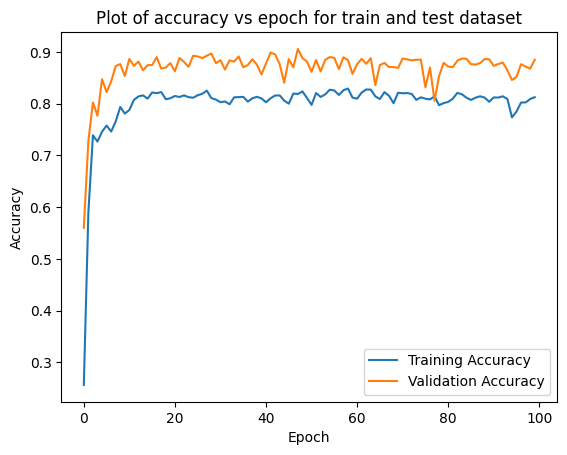

In [ ]:
import matplotlib.pyplot as plt

# Plotar a precisão do treinamento e validação ao longo das épocas
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


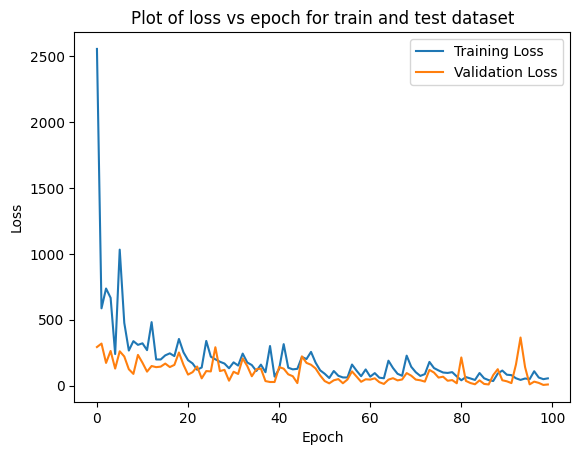

In [ ]:
import matplotlib.pyplot as plt

# Plotar a função de perda do treinamento e validação ao longo das épocas
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# Fazer previsões no conjunto de teste
y_pred_test = model.predict(X_test, batch_size=500)

# Para Plotar a curva ROC
y_pred_evaluation_test = to_categorical(np.argmax(y_pred_test, axis=1), 5)

# Para avaliação
y_pred_argmax_test = np.argmax(y_pred_test, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)


51/51 [==============================] - 1s 12ms/step


In [ ]:
from sklearn.metrics import roc_auc_score

def AUC(actual_class, pred_class, average="micro"):
    """
    Calcula a Área sob a Curva ROC (AUC) para cada classe em um problema de classificação multiclasse.

    Parameters:
    - actual_class: Lista das classes reais.
    - pred_class: Lista das classes previstas.
    - average: Método de média para o cálculo AUC. Pode ser 'micro', 'macro', 'weighted', ou None.

    Returns:
    - Dictionary: Dicionário onde as chaves são as classes e os valores são as AUCs correspondentes.
    """
    # Criar um conjunto de todas as classes únicas
    unique_class = set(actual_class)
    roc_auc_dict = {}

    for per_class in unique_class:
        # Criar uma lista de todas as classes, exceto a classe atual
        other_class = [x for x in unique_class if x != per_class]

        # Transformar a classe atual em 1 e todas as outras classes em 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calcular a roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average=average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict


In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_pred, classes):
    n_classes = len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular as taxas de falso positivo (fpr), verdadeiro positivo (tpr) e AUC para cada classe
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular as taxas de fpr, tpr e AUC para a média micro e macro
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plotar as curvas ROC
    plt.figure(figsize=(10, 10))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
import itertools
from itertools import cycle


Esta função aceita a matriz de confusão cm e as classes reais classes. Se normalize for definido como True, ela normaliza a matriz de confusão dividindo cada linha pela soma total da linha. Em seguida, ela usa a biblioteca Matplotlib para criar uma visualização da matriz de confusão.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Exibe e plota a matriz de confusão.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão, sem normalização')

    # Plotar a matriz de confusão usando imshow
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Adicionar rótulos e anotações
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Configurações adicionais para melhor visualização
    plt.tight_layout()
    plt.ylabel('Rótulo Real')
    plt.xlabel('Rótulo Previsto')

# Exemplo de uso:
# plot_confusion_matrix(confusion_matrix, classes=["Class1", "Class2", "Class3"], normalize=True)



Neste código:

model.evaluate(X_test, y_test, verbose=1): Esta linha usa o método evaluate do modelo para calcular a perda (loss) e a precisão (accuracy) no conjunto de teste (X_test, y_test). O resultado é armazenado na variável test_results.

print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%'): Esta linha imprime os resultados do teste, incluindo a perda e a precisão. A precisão é multiplicada por 100 para apresentá-la como uma porcentagem.

In [ ]:
# Prever o atributo alvo no conjunto de teste
test_results = model.evaluate(X_test, y_test, verbose=1)

# Imprimir os resultados do teste
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')


788/788 [==============================] - 5s 6ms/step - loss: 16.0431 - accuracy: 0.8801
Test results - Loss: 16.04310417175293 - Accuracy: 88.01349401473999%


Essa linha imprime o AUC para o conjunto de teste, usando as classes reais (y_test_argmax) e as classes previstas (y_pred_argmax_test).

In [ ]:
print('AUC Score is on Test: ', AUC(y_test_argmax, y_pred_argmax_test))


AUC Score is on Test:  {0: 0.9347947193629602, 1: 0.6363265966260745, 2: 0.5, 3: 0.5, 4: 0.9049559071434286}


Este código gera um relatório detalhado incluindo precisão, recall, F1-score e suporte para cada classe.

In [ ]:
from sklearn.metrics import classification_report

# Definindo as classes
classes = ['normal', 'Dos', 'Probe', 'R2L', 'U2R']

# Imprimindo o relatório de classificação
print("Classification Report on Data Test:\n", classification_report(y_test_argmax, y_pred_argmax_test, target_names=classes))


Classification Report on Data Test:
               precision    recall  f1-score   support

      normal       0.90      0.93      0.91      9181
         Dos       0.74      0.28      0.41      2357
       Probe       0.00      0.00      0.00       224
         R2L       0.00      0.00      0.00        11
         U2R       0.87      0.97      0.92     13422

    accuracy                           0.88     25195
   macro avg       0.50      0.44      0.45     25195
weighted avg       0.86      0.88      0.86     25195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Este código cria e plota uma matriz de confusão não normalizada para o conjunto de teste.
A matriz de confusão é uma ferramenta útil para entender o desempenho do modelo em cada classe, mostrando quantas instâncias foram corretamente ou incorretamente classificadas. O gráfico resultante ajudará a visualizar a distribuição das classificações do modelo.

Matriz de confusão, sem normalização


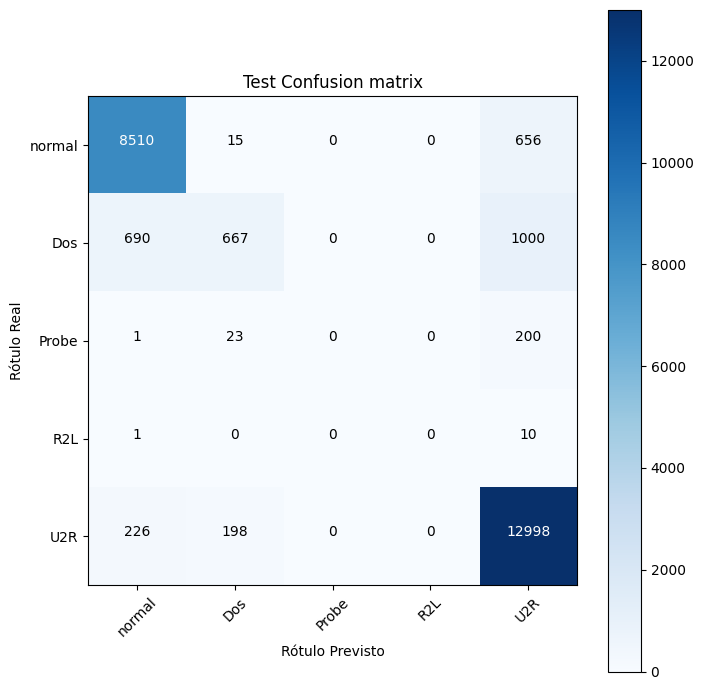

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cnf_matrix = confusion_matrix(y_test_argmax, y_pred_argmax_test)

# Plotar a matriz de confusão não normalizada
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=classes, title='Test Confusion matrix')
plt.show()


Esta chamada à função plot_roc_curve utiliza os dados reais (y_test) e as previsões (y_pred_evaluation_test) para plotar as curvas ROC para cada classe

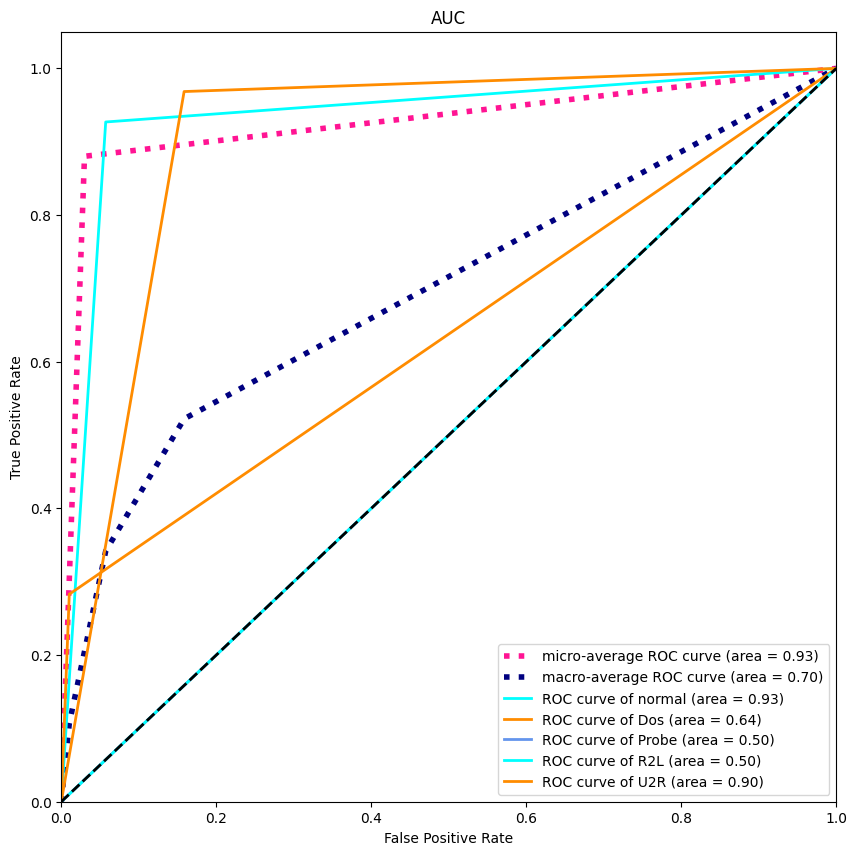

In [ ]:
# Exemplo de uso Esta visualização é útil para avaliar o desempenho do modelo em
#termos de taxa de falso positivo (FPR) versus taxa de verdadeiro positivo (TPR) para diferentes limiares de classificação.
plot_roc_curve(y_test,y_pred_evaluation_test,classes=classes)


Este código cria um gráfico de dispersão (scatter plot) no qual cada ponto representa uma instância projetada no plano 2D pelo t-SNE. As diferentes cores indicam as classes reais

<ipython-input-125-ecc83ea16140>:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cps_df.loc[:, 'target'] = cps_df.target.astype(int)


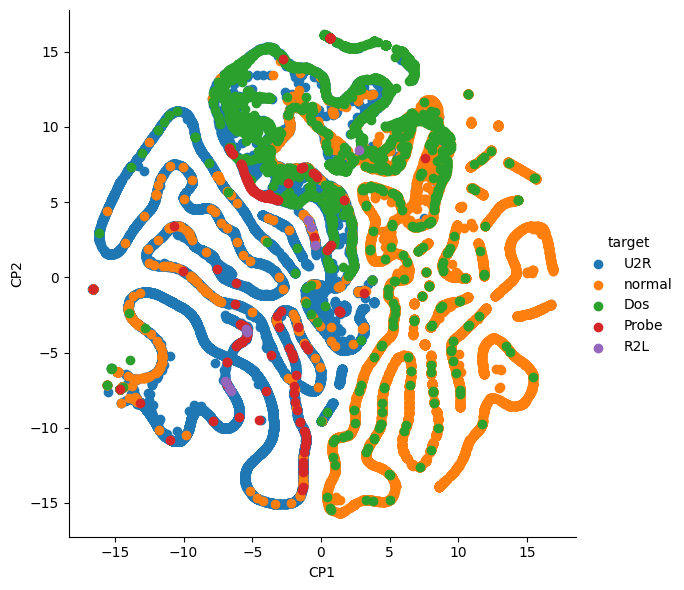

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar o t-SNE nas previsões
tsne2 = TSNE(random_state=42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(y_pred_test)

# Criar dataframe
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                      data=np.column_stack((tsne2, y_test_argmax)))  # cast targets column to int

# Mapear rótulos de classe para nomes
target_name = {
    0: 'normal',
    1: 'Dos',
    2: 'Probe',
    3: 'R2L',
    4: 'U2R',
}

cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.loc[:, 'target'] = cps_df.target.map(target_name)

# Criar um gráfico de dispersão usando Seaborn
grid = sns.FacetGrid(cps_df, hue="target", height=6)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

# Mostrar o gráfico
plt.show()
